In [1]:
# Bilbiotecas para auxílio na programação matemática
import math, sys 
import numpy as np
import sympy as sp

from scipy import sparse # Produção das diagonais das matrizes
from scipy.sparse import diags 

# Plotagem 2D e 3D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm


from os import path # Suficiente para manipulação de arquivos
    
# Para solução exata
from scipy.special import hermite
from math import factorial

%matplotlib inline
count = 0

# Para otimização dos sistemas
from scipy import optimize

import random

In [2]:
def somar(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] + B[i][j]

    return C

def sub(A, B):
    C = []
    nLinhasA, nLinhasB = len(A), len(B)
    nColA, nColB = len(A[0]), len(B[0])
    
    for i in range (nLinhasA):
        linha = [0]*nColA
        C.append(linha)
        for j in range(nColA):
            C[i][j] = A[i][j] - B[i][j]

    return C

def dpsidt(t,psi, H):
    A = np.zeros((2,2), dtype=np.complex_)
    A = np.dot(complex(0,1),H)
    #print("A = ",A)
    #print("psi = ",psi)
    return (-1*np.matmul(A,psi))

def rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0):
    
    n = (int)((t-t0))
    S = np.zeros((2,int(t)), dtype=np.complex_)
    r = 0
    
    for i in range(1 + p, n + 1 + p):
        
        S[0][r] = psi0[0][0]
        S[1][r] = psi0[1][0]
        
        k1 = dpsidt(t0, psi0, H)
        k2 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k1)), H)
        k3 = dpsidt(t0 + 0.5 * h, somar(psi0, np.dot((0.5*h), k2)), H)
        k4 = dpsidt(t0 + h, somar(psi0, np.dot(h, k3)), H)
        
        A = somar(np.dot(2,k3), k4)
        B = somar(np.dot(2,k2), k1)
        C = somar(A, B)
 
        psi0 = somar(psi0,np.dot((h / 6.0),(C)))
    
        t0 = t0 + h
        
        r = r + 1
        
    return S

def fo(x, D, H, i, psi0):
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, x[0]], [x[0], 0]]
    H2 = [[0, x[1]], [x[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    M = [[Result1[0][1]],[Result1[1][1]]]
    Result2 = rungeKutta(psi0, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    Result3 = rungeKutta(psi0, h, somar(H,somar(H1, np.dot(complex(0,1),H2))), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

def foS(x, alpha, d, D, H, i, psi0):
    
    z = x + alpha * d
    
    H1 = np.zeros((2,2), dtype=np.complex_)
    H2 = np.zeros((2,2), dtype=np.complex_)
    
    H1 = [[0, z[0]], [z[0], 0]]
    H2 = [[0, z[1]], [z[1], 0]]
    
    M = np.zeros((2,1),dtype=np.complex_)
    N = np.zeros((2,1),dtype=np.complex_)
    O = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = np.zeros((2,1),dtype=np.complex_)
    Result2 = np.zeros((2,1),dtype=np.complex_)
    Result3 = np.zeros((2,1),dtype=np.complex_)
    
    Result1 = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    M = [[Result1[0][1]],[Result1[1][1]]]
    Result2 = rungeKutta(psi0, h, somar(H,H1), t = 2, t0 = 0, p = 0)
    N = [[Result2[0][1]],[Result2[1][1]]]
    Result3 = rungeKutta(psi0, h, somar(H,somar(H1, np.dot(complex(0,1),H2))), t = 2, t0 = 0, p = 0)
    O = [[Result3[0][1]],[Result3[1][1]]]
    
    Z = np.zeros((2,1),dtype=np.complex_)
    Y = np.zeros((2,1),dtype=np.complex_)
    W = np.zeros((2,1),dtype=np.complex_)
    
    Z[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*i/100)
    Z[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*i/100)
    
    Y[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+1)/100)
    Y[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+1)/100)
    
    W[0][0] = D[0][0]*np.exp(-1*complex(0,1)*(1/2*np.pi)*(i+2)/100)
    W[1][0] = D[1][0]*np.exp(-1*complex(0,1)*(3/2*np.pi)*(i+2)/100)

    return (np.linalg.norm(Z-M)**2+np.linalg.norm(Y-N)**2+np.linalg.norm(W-O)**2)

In [3]:
def SecaoAurea(d, x, D, H, i, psi0):
    eps = 0.00000001
    a = 0
    b = 1
    xa = b - 0.618*(b-a)
    xb = a + 0.618*(b-a)
    fxa = foS(x, xa, d, D, H, i, psi0)
    fxb = foS(x, xb, d, D, H, i, psi0)
    
    while(b - a > eps):
        if(fxa < fxb):
            b = xb
            xb = xa
            xa = b - 0.618*(b - a)
            fxb = fxa
            fxa = foS(x, xa, d, D, H, i, psi0)
        else:
            a = xa
            xa = xb
            xb = a + 0.618*(b - a)
            fxa = fxb
            fxb = foS(x, xb, d, D, H, i, psi0)
            
    xp = (a+b)/2
    return xp

#Avaliação do gradiente
def gradiente(x, D, H, i, psi0):
    h = 0.0000001
    grad = []
    
    for i in range(len(x)):
        xh = x.copy()
        xh[i] = xh[i] + h
        dx = (fo(xh, D, H, i, psi0)-fo(x, D, H, i, psi0))/h
        grad.append(dx)
    return grad

In [4]:
def MetodoGrad(x, D, H, i, psi0):
    
    eps = 0.00000001
    errox = eps + 1
    xant = x.copy()
    
    k = 0
    kmax = 100
    normagrad = eps + 1
    
    CP = ''
    
    while(CP == ''):
        d = -1*np.array(gradiente(x, D, H, i, psi0))
        alpha = SecaoAurea(d, x, D, H, i, psi0)
        x = x + alpha * d
        
        errox = np.linalg.norm(xant - x)
        xant = x.copy()
        if(errox <= eps):
            CP = CP + 'Erro x'
        normagrad = np.linalg.norm(d)
        if(normagrad <= eps):
            CP = CP + 'Norma Gradiente'
        if(k >= kmax):
            CP = 'Numero de iteracoes'
            
        k += 1
        
    xOtimo = x
    return k, xOtimo, CP

In [5]:
x = []
x.append(random.uniform(-5., 5.))
x.append(random.uniform(-5., 5.))

i = 0

psi0 = [[complex(0.80,0)],[complex(0.60,0)]]
h = 0.01

E = np.zeros((2,2))
I = np.zeros((2,2))
R = np.zeros((2,2), dtype=np.complex_)
H = E.astype(complex)

A = (1/2*np.pi)
B = (3/2*np.pi)

I = [[1, 0], [0, 1]]
H = [[A, 0], [0, B]]
R = H

Resp = np.zeros((2,1000), dtype=np.complex_)

D = np.zeros((2,1), dtype=np.complex_)
D = [[complex(1/np.sqrt(2),0)],[complex(1/np.sqrt(2),0)]]

while i < 1000:
    
    print("iteracao: ", i+1)
    
    Resp[0][i] = psi0[0][0]
    Resp[1][i] = psi0[1][0]
    
    resultado = MetodoGrad(x, D, H, i, psi0)
    
    x = []
    u = np.zeros((2,2))
    x.append(random.uniform(-5., 5.))
    x.append(random.uniform(-5., 5.))
    
    u = [[0, resultado[1][0]],[resultado[1][0], 0]]
        
    i = i + 1
    H = somar(H, u)
    
    psi_t = np.zeros((2,2), dtype=np.complex_)
    
    psi_t = rungeKutta(psi0, h, H, t = 2, t0 = 0, p = 0)
    
    psi0[0][0] = psi_t[0][1]
    psi0[1][0] = psi_t[1][1]
    
    H = [[A, 0], [0, B]]
    
    print(psi0)

iteracao:  1
[[(0.7998384193493748-0.01444225118829086j)], [(0.59925236099979-0.030765761443592565j)]]
iteracao:  2
[[(0.7987075710918133-0.03569519476411305j)], [(0.5964994478546694-0.0705724972638734j)]]
iteracao:  3
[[(0.7965500030360396-0.05754597763739311j)], [(0.5914867278644143-0.11108556768046823j)]]
iteracao:  4
[[(0.7894401639652276-0.0945313248088432j)], [(0.5816371716788828-0.1718902374242165j)]]
iteracao:  5
[[(0.7962359993715484-0.07852349683864167j)], [(0.5780541346903061-0.1602988089043807j)]]
iteracao:  6
[[(0.7939304177989837-0.09410918504788872j)], [(0.5692946011179157-0.1916288262553809j)]]
iteracao:  7
[[(0.7936135277838358-0.1031412211848909j)], [(0.5603491546105378-0.21342042740523587j)]]
iteracao:  8
[[(0.801124025270962-0.09159825956232302j)], [(0.5546837808585601-0.2052704437733474j)]]
iteracao:  9
[[(0.8011008327777238-0.10039310414314333j)], [(0.5451894933552336-0.2256703204274011j)]]
iteracao:  10
[[(0.7975107385900025-0.11714909682376172j)], [(0.5329599510

[[(0.22145901115538258-0.8656450237646917j)], [(-0.3055538308558798+0.329015835150254j)]]
iteracao:  84
[[(0.21045270495268587-0.8667029658015211j)], [(-0.2964688471555453+0.34152864421796797j)]]
iteracao:  85
[[(0.18554459575054835-0.8785587026960382j)], [(-0.25209521063222723+0.36077108659646856j)]]
iteracao:  86
[[(0.17477105983452165-0.8793396325457852j)], [(-0.24213994333635197+0.37092465319896634j)]]
iteracao:  87
[[(0.1523445193979263-0.886958923141289j)], [(-0.20434433165588684+0.38514720958890025j)]]
iteracao:  88
[[(0.11957385499071711-0.8973956284952671j)], [(-0.14323249298943483+0.3998344555682916j)]]
iteracao:  89
[[(0.10177342441885509-0.9003168458703543j)], [(-0.1160182645677737+0.4069538905982114j)]]
iteracao:  90
[[(0.105455146837269-0.8964414580085205j)], [(-0.1360342790389443+0.40837061457478824j)]]
iteracao:  91
[[(0.10484232480832993-0.8934657679800816j)], [(-0.14607186836615427+0.4115701363961072j)]]
iteracao:  92
[[(0.08422268515891553-0.8969903254109098j)], [(-0

[[(-0.5697171287780761-0.3179329626361114j)], [(0.0182756340370853-0.7576324531344938j)]]
iteracao:  163
[[(-0.5740264222604168-0.3089493950391651j)], [(-0.01719101840375216-0.7581215700981024j)]]
iteracao:  164
[[(-0.5642280645988079-0.300624811366477j)], [(-0.047318149643233075-0.7674844068630037j)]]
iteracao:  165
[[(-0.547335661116743-0.2936029553981203j)], [(-0.07551497409990916-0.780075877849546j)]]
iteracao:  166
[[(-0.5425508668967521-0.2861444410361722j)], [(-0.1088687969314335-0.7822451076911607j)]]
iteracao:  167
[[(-0.530493384973873-0.2803309620227829j)], [(-0.13991250520562834-0.7876647248027212j)]]
iteracao:  168
[[(-0.5249901976557354-0.2740028954728965j)], [(-0.17354961319916792-0.7868850900017821j)]]
iteracao:  169
[[(-0.517565741476409-0.26863876223234245j)], [(-0.20657785841194798-0.7856744964920869j)]]
iteracao:  170
[[(-0.5393371031561334-0.2551408720533638j)], [(-0.24904749589601782-0.7628852313411489j)]]
iteracao:  171
[[(-0.5055166778087609-0.25976205101517j)],

[[(-0.4537563808961306+0.4330087707816438j)], [(0.509416577674403+0.5891546159944013j)]]
iteracao:  246
[[(-0.45586590922866316+0.4483375483820899j)], [(0.5294978659903394+0.5575047848900283j)]]
iteracao:  247
[[(-0.4229359489494539+0.42930503201404424j)], [(0.5762469426333003+0.5520522541781183j)]]
iteracao:  248
[[(-0.4409933567315137+0.46354413999795685j)], [(0.5799562743334701+0.5042839129878818j)]]
iteracao:  249
[[(-0.4245552181302558+0.4592645326899572j)], [(0.611832066454131+0.48424201949953444j)]]
iteracao:  250
[[(-0.42846852835498445+0.480976912896183j)], [(0.6222917925444295+0.44477939388467946j)]]
iteracao:  251
[[(-0.43621946183855925+0.5107171909254907j)], [(0.6239344554056075+0.3994823914933148j)]]
iteracao:  252
[[(-0.4430179020345105+0.5425777906773513j)], [(0.6205445461887411+0.35251779828752855j)]]
iteracao:  253
[[(-0.41846129252087205+0.5194431002680078j)], [(0.6616982012187522+0.3423804222039058j)]]
iteracao:  254
[[(-0.4157699418003036+0.5375408649342553j)], [(0

[[(0.17053548893518738+0.6255887508721928j)], [(-0.7364128837548587-0.1930083947347621j)]]
iteracao:  329
[[(0.1838255659917665+0.6072910542093706j)], [(-0.7573982297982674-0.15412161397502275j)]]
iteracao:  330
[[(0.18880768324928004+0.6298298199485391j)], [(-0.7429810244972512-0.12508024237147244j)]]
iteracao:  331
[[(0.19813949204590464+0.6307057489039049j)], [(-0.7447569557100545-0.09103784912899972j)]]
iteracao:  332
[[(0.20787948010199778+0.6290816926859089j)], [(-0.7469077983358856-0.05631074003461649j)]]
iteracao:  333
[[(0.21786626575019458+0.6226994296294323j)], [(-0.7512481988463365-0.02014118162093003j)]]
iteracao:  334
[[(0.22764191990873253+0.6258745470832068j)], [(-0.7458464905589446+0.013154197756865868j)]]
iteracao:  335
[[(0.23888814972683767+0.6563859903753749j)], [(-0.714664265491722+0.03666991364488402j)]]
iteracao:  336
[[(0.25145115627950815+0.6823028868527838j)], [(-0.6839078181431015+0.05920298317664557j)]]
iteracao:  337
[[(0.2638072281351887+0.692752616765863

[[(0.8586205767794389-0.004266419899498284j)], [(0.452445229009617-0.24092650866684193j)]]
iteracao:  411
[[(0.8551410218320594-0.023395221104670176j)], [(0.4401615237051771-0.27284445083547965j)]]
iteracao:  412
[[(0.8422608049047041-0.05439327414768304j)], [(0.424411126183669-0.32789185286612316j)]]
iteracao:  413
[[(0.848432749000001-0.05871031295320413j)], [(0.41013472887184393-0.3293998127931436j)]]
iteracao:  414
[[(0.8482577623945733-0.0710313844067077j)], [(0.39437446167023293-0.34623959599084064j)]]
iteracao:  415
[[(0.8335033577840528-0.09816423398788846j)], [(0.3738409826595244-0.39481466157078093j)]]
iteracao:  416
[[(0.8460591160307883-0.09805451666276324j)], [(0.35910204869171763-0.3815950261401245j)]]
iteracao:  417
[[(0.8569190606710845-0.09981238581465184j)], [(0.34465274593039014-0.37005601886100614j)]]
iteracao:  418
[[(0.844705552096906-0.12216159895115118j)], [(0.32331400953527006-0.4086769946558301j)]]
iteracao:  419
[[(0.8535912557664622-0.1270529227460661j)], [(

[[(0.12459693146843048-0.8713039610229876j)], [(0.01686666544531572+0.4743629896559072j)]]
iteracao:  490
[[(0.11181753533620048-0.8732137252707893j)], [(0.03749037175786135+0.4728517938765528j)]]
iteracao:  491
[[(0.09715339277913211-0.8747569327540115j)], [(0.061459705244129456+0.4707270436412514j)]]
iteracao:  492
[[(0.07057467377125504-0.8737659408791777j)], [(0.10750217859233656+0.4690365604905295j)]]
iteracao:  493
[[(0.06772586364835372-0.8773874645221041j)], [(0.10894325659766774+0.4623153997235089j)]]
iteracao:  494
[[(0.040642447264048906-0.8744029935503933j)], [(0.15599046564493924+0.4576399105809125j)]]
iteracao:  495
[[(0.019018189678009053-0.8718345935357485j)], [(0.19259422184209468+0.4499443657099529j)]]
iteracao:  496
[[(0.012955013460341966-0.8754515274564396j)], [(0.19854316737531544+0.44045103918647144j)]]
iteracao:  497
[[(0.014558680964952626-0.8825073299803978j)], [(0.1879736952611057+0.4308531811323171j)]]
iteracao:  498
[[(-0.019955391417605394-0.87178481726661

[[(-0.3252997667195255-0.3580544653931379j)], [(-0.45080529489369875-0.7501675247036259j)]]
iteracao:  570
[[(-0.35863708998839827-0.33460324463455j)], [(-0.4985269912137328-0.7147661231717838j)]]
iteracao:  571
[[(-0.34682801133692415-0.3414375171783371j)], [(-0.5236677993163288-0.6992155988097554j)]]
iteracao:  572
[[(-0.34060734695950606-0.34508345661249584j)], [(-0.5503833933563415-0.6796924514786895j)]]
iteracao:  573
[[(-0.37716259178739964-0.31205495796591504j)], [(-0.5970750540018858-0.6355085550329114j)]]
iteracao:  574
[[(-0.3816226988128721-0.30648720997253487j)], [(-0.6261564652142456-0.6069245817212408j)]]
iteracao:  575
[[(-0.3835090785578771-0.30361149223621225j)], [(-0.6526013933369187-0.578663918617338j)]]
iteracao:  576
[[(-0.36226148833847255-0.32795775265190985j)], [(-0.6650779659809957-0.5646957463128189j)]]
iteracao:  577
[[(-0.3742888690302591-0.3134729022216111j)], [(-0.6949310040120719-0.5279328950668937j)]]
iteracao:  578
[[(-0.3952519091391705-0.2845045929812

[[(-0.5487345412157952+0.22612669004872923j)], [(0.6982409097310259+0.4002703673392291j)]]
iteracao:  648
[[(-0.5366302825128847+0.21896651699890052j)], [(0.7215201763794521+0.37880054233709604j)]]
iteracao:  649
[[(-0.5348359796375198+0.2309028308244525j)], [(0.7374172730674377+0.3418329041122887j)]]
iteracao:  650
[[(-0.525382193508541+0.22590768465143735j)], [(0.7569951295670724+0.31606526822192604j)]]
iteracao:  651
[[(-0.5089892075268216+0.20159703578321933j)], [(0.7805770291879366+0.3016417308490082j)]]
iteracao:  652
[[(-0.4984071513012825+0.1890147375054936j)], [(0.7992941248968971+0.2774747784946858j)]]
iteracao:  653
[[(-0.5001791847757531+0.212456358337495j)], [(0.8073548198465127+0.22991494871773094j)]]
iteracao:  654
[[(-0.4962191666975301+0.21805822886337353j)], [(0.8179099474296243+0.19297687705116734j)]]
iteracao:  655
[[(-0.4983810491401998+0.25503666066155717j)], [(0.817243468720356+0.13669437669148937j)]]
iteracao:  656
[[(-0.4969984823021489+0.2838118903077927j)], [

[[(-0.02417462456246327+0.5718461305600347j)], [(-0.8171572962920627-0.06827221377529176j)]]
iteracao:  725
[[(-0.015397443235807632+0.5761510969038781j)], [(-0.8166590105554513-0.029672280214129564j)]]
iteracao:  726
[[(-0.006556163061811804+0.6185330085228474j)], [(-0.7856831466100963+0.008687666589922816j)]]
iteracao:  727
[[(0.0054097688354925125+0.6705849694890678j)], [(-0.7404632060080248+0.04472486865698644j)]]
iteracao:  728
[[(0.01652132166691136+0.6766966914171028j)], [(-0.731789145398721+0.07932730017349196j)]]
iteracao:  729
[[(0.02718813195467149+0.6766370428179342j)], [(-0.7269771358879178+0.11369653337553184j)]]
iteracao:  730
[[(0.04691689413487908+0.7233620500954263j)], [(-0.6736049345933328+0.14422923923397002j)]]
iteracao:  731
[[(0.05642456152716367+0.7150294258564518j)], [(-0.6740719522021136+0.1765664860595065j)]]
iteracao:  732
[[(0.06520290087019709+0.7057512238340504j)], [(-0.6737567185026995+0.2090818205041423j)]]
iteracao:  733
[[(0.08483723452308871+0.729111

[[(0.74501050321339+0.1719532483124819j)], [(0.4982963235609771-0.40876850085407285j)]]
iteracao:  803
[[(0.7587958215014398+0.17326977267643573j)], [(0.47430459351731735-0.41138925899899087j)]]
iteracao:  804
[[(0.7591848361452165+0.15891571820727052j)], [(0.4551738332110737-0.43726472902966745j)]]
iteracao:  805
[[(0.743676541258012+0.12991113164668222j)], [(0.43893449254635436-0.48724151324560083j)]]
iteracao:  806
[[(0.7649632760023964+0.13497681662759448j)], [(0.410923822865505-0.47723530645802287j)]]
iteracao:  807
[[(0.756179027550709+0.11433171896066911j)], [(0.3902999625772841-0.512627501979204j)]]
iteracao:  808
[[(0.7703810259822446+0.11148209551913606j)], [(0.36341420332543-0.5118734356041984j)]]
iteracao:  809
[[(0.7951288837372382+0.11513514418842591j)], [(0.33455270067143894-0.4925321577863776j)]]
iteracao:  810
[[(0.7933963428959739+0.10045736402329586j)], [(0.31158619164739204-0.5131706201123701j)]]
iteracao:  811
[[(0.7988264346497105+0.0902251997383635j)], [(0.286484

[[(0.17337639123027512-0.8191862414601869j)], [(0.42074084461050426+0.34907174969647503j)]]
iteracao:  891
[[(0.1460867516513752-0.8027294982698955j)], [(0.4713490283786863+0.33483357247190376j)]]
iteracao:  892
[[(0.13816335048411224-0.8119399604152094j)], [(0.4746465442951553+0.31044236403376063j)]]
iteracao:  893
[[(0.11814546316299843-0.801944552482304j)], [(0.5085207897368051+0.2904007652158652j)]]
iteracao:  894
[[(0.1184759897121582-0.8274091876615959j)], [(0.48273094173924974+0.26139572779005366j)]]
iteracao:  895
[[(0.09780674044778202-0.8135934347478344j)], [(0.5199671867687363+0.24110806931079035j)]]
iteracao:  896
[[(0.09280483595417768-0.8329246343197177j)], [(0.5019546551854779+0.2136931247779558j)]]
iteracao:  897
[[(0.08055439799297683-0.8364428648847697j)], [(0.5078919302899632+0.18952446101296044j)]]
iteracao:  898
[[(0.07557217169806864-0.8610321673582781j)], [(0.47588412260105484+0.1626227709003683j)]]
iteracao:  899
[[(0.069266053685568-0.884812794085736j)], [(0.43

[[(-0.2683969484153645-0.44753577468516725j)], [(-0.8329892104973119-0.18385630967293956j)]]
iteracao:  977
[[(-0.27447759260636456-0.4481042503623323j)], [(-0.8381739212971326-0.1460426939956998j)]]
iteracao:  978
[[(-0.28526506910504124-0.41577439522788445j)], [(-0.8581238158780063-0.09684196878937887j)]]
iteracao:  979
[[(-0.2926208288646842-0.4003151792283711j)], [(-0.8668105686903288-0.05253192598337252j)]]
iteracao:  980
[[(-0.2996837872525023-0.35765680950215534j)], [(-0.8844591602406462+0.001607182940157735j)]]
iteracao:  981
[[(-0.30486835581103067-0.3417002829644463j)], [(-0.8877320009638544+0.047195883041226155j)]]
iteracao:  982
[[(-0.31091037973498653-0.34543569143805325j)], [(-0.8812656828602958+0.08590151104430294j)]]
iteracao:  983
[[(-0.314187276793262-0.3245368428619378j)], [(-0.8821780223084701+0.13312957547425372j)]]
iteracao:  984
[[(-0.32279370444083316-0.33929398840295244j)], [(-0.8676032616079008+0.16717580016502692j)]]
iteracao:  985
[[(-0.31956758900187027-0.2

In [6]:
len(Resp[0])

1000

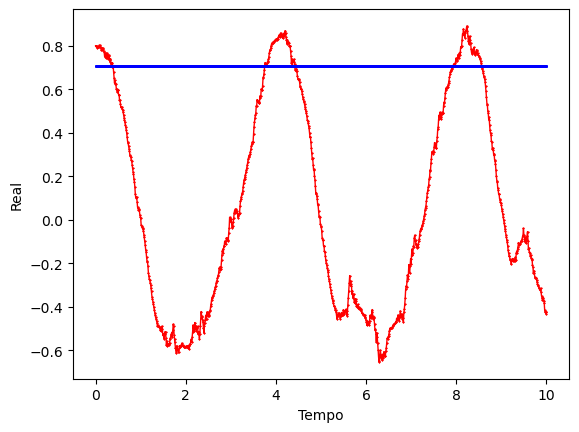

In [7]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[0]] 
y = [ele.imag for ele in Resp[0]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()

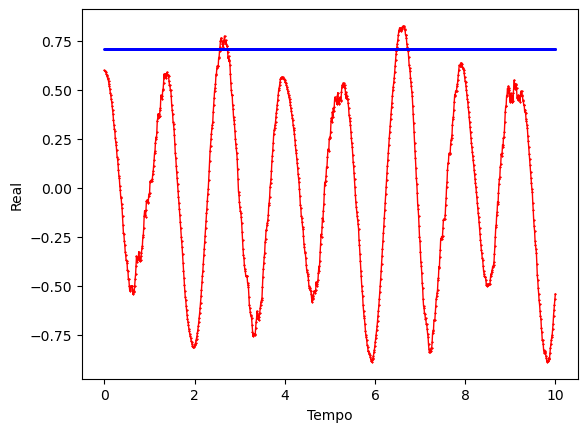

In [8]:
ts = np.linspace(0, 10, 1000)

x = [ele.real for ele in Resp[1]] 
y = [ele.imag for ele in Resp[1]] 

plt.ylabel('Real') 
plt.xlabel('Tempo') 
plt.plot(ts, x, color='r', marker='*', linewidth=1, markersize=1)

p = []

for i in range(0, 1000):
    p.append(1/np.sqrt(2))

plt.plot(ts, p, color='b', marker='o',  linewidth=1, markersize=1)
plt.show()